In [139]:
import cv2
import os

video_path = 'traffic_25fps.mp4'
output_folder = 'frames/'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(f'{output_folder}/frame_{frame_count:04d}.png', frame)
    frame_count += 1

cap.release()


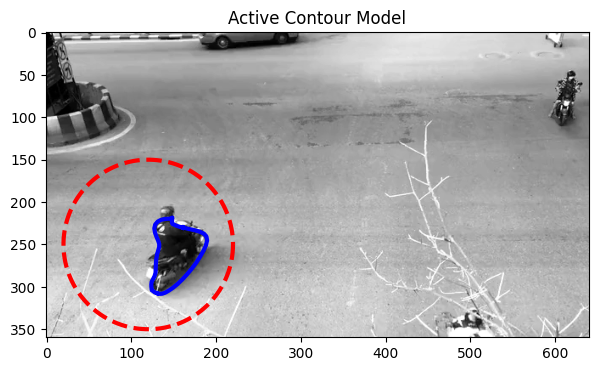

In [145]:
from skimage import io, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np
import matplotlib.pyplot as plt

# Load a sample frame
image = io.imread('frames/frame_0000.png')
gray_image = color.rgb2gray(image)

# Gaussian smoothing
smooth_image = gaussian(gray_image, sigma=3)

# Initialize the snake
s = np.linspace(0, 2*np.pi, 400)
x = 120 + 100*np.cos(s)
y = 250 + 100*np.sin(s)
init = np.array([y, x]).T

# Run Active Contour Model
snake = active_contour(smooth_image, init, alpha=0.001, beta=0.01, gamma=0.001)

# Plot the result
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.imshow(gray_image, cmap=plt.cm.gray)
# ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
# ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
# ax.set_title('Active Contour Model')
# plt.show()


In [146]:
frame_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.png')])

for frame_file in frame_files:
    image = io.imread(f'{output_folder}/{frame_file}')
    gray_image = color.rgb2gray(image)
    smooth_image = gaussian(gray_image, sigma=3)
    snake = active_contour(smooth_image, init, alpha=0.001, beta=0.01, gamma=0.001)
    
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(gray_image, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(f'Active Contour Model - {frame_file}')
    plt.savefig(f'output/{frame_file}')
    plt.close()
    
    init = snake # Update the initial contour for the next frame


In [147]:

output_folder = 'output/'
output_video_path = 'segmented_video.mp4'
frame_rate = 30

frame_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.png')])
frame = cv2.imread(os.path.join(output_folder, frame_files[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, (width, height))

for frame_file in frame_files:
    frame = cv2.imread(os.path.join(output_folder, frame_file))
    video.write(frame)

video.release()
